In [1]:
! pip install Faker

In [2]:
from faker import Faker
import pandas as pd
import random

# Inicializar el generador de datos falsos
fake = Faker()

# Generar datos de pronóstico de demanda
demand_forecast_data = []
for month in range(1, 13):
    demand_forecast_data.append({
        'Month': month,
        'Demand_Forecast': random.randint(8000, 20000)
    })

# Generar datos de capacidad de producción
production_capacity_data = []
for month in range(1, 13):
    production_capacity_data.append({
        'Month': month,
        'Capacity': random.randint(7000, 18000)
    })

# Crear DataFrame para los datos de pronóstico de demanda
demand_forecast_df = pd.DataFrame(demand_forecast_data)

# Crear DataFrame para los datos de capacidad de producción
production_capacity_df = pd.DataFrame(production_capacity_data)

# Generar datos de inventario inicial
starting_inventory = random.randint(1000, 5000)

# Imprimir los primeros registros de cada DataFrame para verificar
print("Datos de Pronóstico de Demanda:")
print(demand_forecast_df.head())

print("\nDatos de Capacidad de Producción:")
print(production_capacity_df.head())

print(f"\nInventario Inicial: {starting_inventory}")

Datos de Pronóstico de Demanda:
   Month  Demand_Forecast
0      1            13883
1      2            19973
2      3             9689
3      4            11061
4      5            14821

Datos de Capacidad de Producción:
   Month  Capacity
0      1     12018
1      2     15719
2      3      7923
3      4      8236
4      5     13651

Inventario Inicial: 2724


In [3]:
# Guardar los datos de pronóstico de demanda en un archivo CSV
demand_forecast_df.to_csv('demand_forecast.csv', index=False)

# Guardar los datos de capacidad de producción en un archivo CSV
production_capacity_df.to_csv('production_capacity.csv', index=False)

# Guardar el inventario inicial en un archivo CSV
with open('starting_inventory.txt', 'w') as file:
    file.write(str(starting_inventory))

print("Los datos han sido guardados en archivos CSV.")


Los datos han sido guardados en archivos CSV.


## EDA

Para realizar un Análisis Exploratorio de Datos (EDA) completo para este caso, podríamos realizar una serie de pasos que nos ayudarán a comprender mejor los datos y obtener información útil. Aquí te muestro cómo podríamos hacerlo:

Cargar los datos: Cargar los datos generados previamente desde los archivos CSV.

Exploración de los datos: Observar las primeras filas de cada DataFrame, comprobar tipos de datos, identificar valores faltantes, estadísticas descriptivas básicas, etc.

Visualización de datos: Crear visualizaciones para comprender mejor la distribución y tendencias de los datos. Esto incluye histogramas, gráficos de líneas, diagramas de dispersión, etc.

Análisis de correlación: Identificar si hay alguna correlación entre las variables, por ejemplo, si la demanda pronosticada afecta la capacidad de producción.

Resumen del inventario inicial: Analizar el inventario inicial y su impacto en la planificación de la producción.

Comparación de demanda pronosticada y capacidad de producción: Comparar la demanda pronosticada con la capacidad de producción para identificar posibles cuellos de botella.

Conclusiones y recomendaciones preliminares: Basado en los hallazgos del EDA, hacer recomendaciones preliminares para mejorar la planificación de la producción.

Datos de Pronóstico de Demanda:
   Month  Demand_Forecast
0      1            13883
1      2            19973
2      3             9689
3      4            11061
4      5            14821

Datos de Capacidad de Producción:
   Month  Capacity
0      1     12018
1      2     15719
2      3      7923
3      4      8236
4      5     13651

Inventario Inicial: 2724


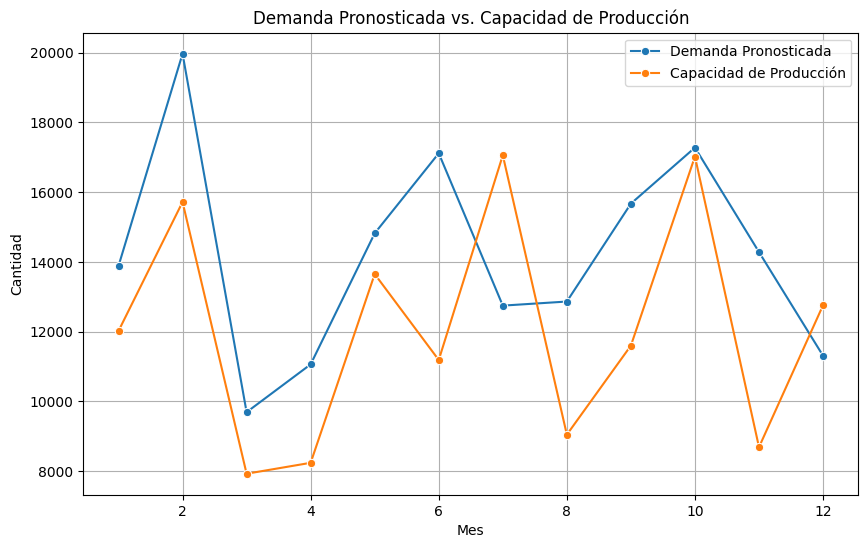


Correlación entre la demanda pronosticada y la capacidad de producción: 0.5531141466019139

Resumen del Inventario Inicial: 2724


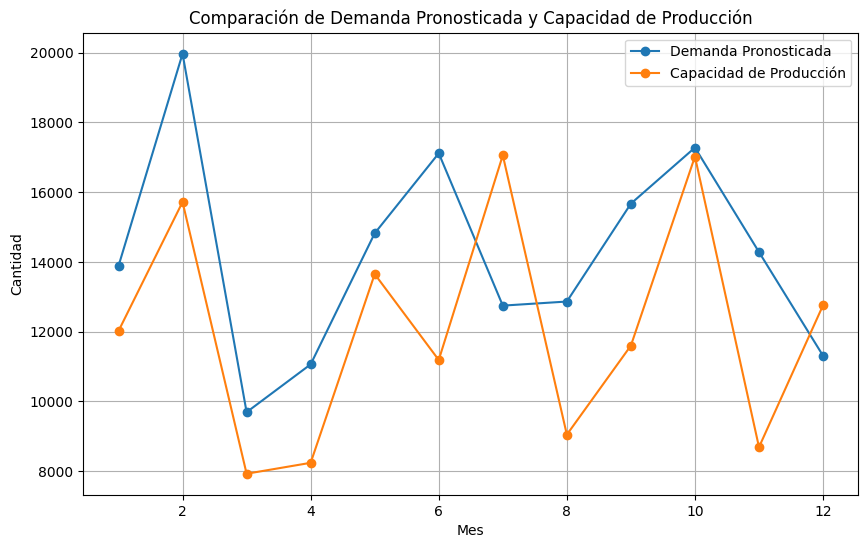

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde los archivos CSV
demand_forecast_df = pd.read_csv('demand_forecast.csv')
production_capacity_df = pd.read_csv('production_capacity.csv')

# Cargar el inventario inicial desde el archivo de texto
with open('starting_inventory.txt', 'r') as file:
    starting_inventory = int(file.readline())

# Exploración de los datos
print("Datos de Pronóstico de Demanda:")
print(demand_forecast_df.head())
print("\nDatos de Capacidad de Producción:")
print(production_capacity_df.head())
print(f"\nInventario Inicial: {starting_inventory}")

# Visualización de datos
plt.figure(figsize=(10, 6))
sns.lineplot(data=demand_forecast_df, x='Month', y='Demand_Forecast', marker='o', label='Demanda Pronosticada')
sns.lineplot(data=production_capacity_df, x='Month', y='Capacity', marker='o', label='Capacidad de Producción')
plt.title('Demanda Pronosticada vs. Capacidad de Producción')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.show()

# Análisis de correlación
correlation = demand_forecast_df['Demand_Forecast'].corr(production_capacity_df['Capacity'])
print(f"\nCorrelación entre la demanda pronosticada y la capacidad de producción: {correlation}")

# Resumen del inventario inicial
print(f"\nResumen del Inventario Inicial: {starting_inventory}")

# Comparación de demanda pronosticada y capacidad de producción
plt.figure(figsize=(10, 6))
plt.plot(demand_forecast_df['Month'], demand_forecast_df['Demand_Forecast'], marker='o', label='Demanda Pronosticada')
plt.plot(production_capacity_df['Month'], production_capacity_df['Capacity'], marker='o', label='Capacidad de Producción')
plt.title('Comparación de Demanda Pronosticada y Capacidad de Producción')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.show()

El siguiente código primero carga los datos de pronóstico de demanda y capacidad de producción, así como el inventario inicial. Luego, calcula la demanda neta y el plan de producción inicial. A continuación, simula una reunión de S&OP para ajustar el plan de producción si es necesario. Finalmente, muestra el plan de producción final.

In [5]:
import pandas as pd
import numpy as np

# Cargar los datos desde los archivos CSV
demand_forecast_df = pd.read_csv('demand_forecast.csv')
production_capacity_df = pd.read_csv('production_capacity.csv')

# Cargar el inventario inicial desde el archivo de texto
with open('starting_inventory.txt', 'r') as file:
    starting_inventory = int(file.readline())

# Calcular la demanda neta
demand_forecast_df['Net_Demand'] = demand_forecast_df['Demand_Forecast'] - starting_inventory

# Calcular el plan de producción inicial
production_plan = pd.merge(demand_forecast_df, production_capacity_df, on='Month')
production_plan['Initial_Production_Plan'] = np.minimum(production_plan['Net_Demand'], production_plan['Capacity'])

# Simular una reunión de S&OP para ajustar el plan de producción
for index, row in production_plan.iterrows():
    if row['Initial_Production_Plan'] < row['Net_Demand']:
        shortage = row['Net_Demand'] - row['Initial_Production_Plan']
        print(f"En el mes {row['Month']}, hay una escasez de {shortage} unidades. Se necesitan ajustes en la capacidad de producción.")
        # Aquí se podrían implementar decisiones de ajuste, como aumentar la capacidad de producción o subcontratar
    else:
        print(f"En el mes {row['Month']}, el plan de producción inicial es suficiente para satisfacer la demanda pronosticada.")

# Mostrar el plan de producción final
print("\nPlan de Producción Final:")
print(production_plan[['Month', 'Initial_Production_Plan']])

En el mes 1, el plan de producción inicial es suficiente para satisfacer la demanda pronosticada.
En el mes 2, hay una escasez de 1530 unidades. Se necesitan ajustes en la capacidad de producción.
En el mes 3, el plan de producción inicial es suficiente para satisfacer la demanda pronosticada.
En el mes 4, hay una escasez de 101 unidades. Se necesitan ajustes en la capacidad de producción.
En el mes 5, el plan de producción inicial es suficiente para satisfacer la demanda pronosticada.
En el mes 6, hay una escasez de 3207 unidades. Se necesitan ajustes en la capacidad de producción.
En el mes 7, el plan de producción inicial es suficiente para satisfacer la demanda pronosticada.
En el mes 8, hay una escasez de 1095 unidades. Se necesitan ajustes en la capacidad de producción.
En el mes 9, hay una escasez de 1349 unidades. Se necesitan ajustes en la capacidad de producción.
En el mes 10, el plan de producción inicial es suficiente para satisfacer la demanda pronosticada.
En el mes 11, h

## Machine Learning para SOP
podríamos utilizar algoritmos de machine learning para predecir la demanda. La predicción de la demanda es un problema típico en la gestión de la cadena de suministro, y los algoritmos de machine learning pueden ser muy útiles para este propósito.

Algunos algoritmos de machine learning comúnmente utilizados para predecir la demanda incluyen:

Regresión Lineal: Es útil cuando existe una relación lineal entre las variables predictoras y la demanda.

Regresión Logística: Adecuada para problemas de clasificación binaria, como predecir si la demanda será alta o baja.

Random Forest: Un algoritmo de aprendizaje ensemble que puede manejar múltiples características y no linealidades en los datos.

Support Vector Machines (SVM): Puede ser eficaz en problemas de regresión y clasificación, especialmente en conjuntos de datos con alta dimensionalidad.

Redes Neuronales Artificiales (ANN): Útiles para capturar relaciones complejas entre variables y realizar predicciones precisas.

Algunos pasos típicos para utilizar algoritmos de machine learning en la predicción de la demanda incluyen:

Preprocesamiento de datos: Limpieza de datos, manejo de valores faltantes, codificación de variables categóricas, etc.

Selección de características: Identificación de las características más relevantes para la predicción de la demanda.

División de datos: Separación de los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo.

Entrenamiento del modelo: Ajuste del modelo a los datos de entrenamiento utilizando un algoritmo de machine learning específico.

Validación y ajuste del modelo: Evaluación del rendimiento del modelo en los datos de prueba y ajuste de los hiperparámetros para mejorar su rendimiento.

Predicción de la demanda: Utilización del modelo entrenado para hacer predicciones sobre la demanda futura.

Es importante tener en cuenta que la elección del algoritmo de machine learning y la metodología de modelado dependerán del conjunto de datos específico y de los objetivos comerciales. Además, es fundamental evaluar el rendimiento del modelo en datos históricos y, si es posible, en datos de validación independientes antes de implementarlo en la práctica.

### Procedimiento 

Para elegir el algoritmo de machine learning más adecuado y la metodología de modelado para nuestro caso de predicción de la demanda, primero necesitamos considerar algunos factores importantes:

Características de los datos: Debemos comprender la naturaleza de nuestros datos, incluyendo su distribución, tipo de variables (categóricas, numéricas), posibles relaciones entre variables, etc.

Tamaño del conjunto de datos: Si tenemos un gran conjunto de datos, podríamos considerar algoritmos más complejos y poderosos. Para conjuntos de datos pequeños, es posible que algoritmos más simples funcionen mejor.

Objetivos comerciales: ¿Cuál es el objetivo final de nuestra predicción de la demanda? ¿Es maximizar los ingresos, minimizar los costos de inventario, optimizar la utilización de recursos, etc.? Esto influirá en cómo definimos nuestro problema de predicción y qué métricas de evaluación utilizamos.

Requisitos de interpretabilidad: Algunos algoritmos, como la regresión lineal o los árboles de decisión, son más fáciles de interpretar que otros, como las redes neuronales.

Dado que tenemos datos generados con Faker, podemos explorar estos datos y realizar algunas pruebas preliminares para ayudarnos a tomar decisiones sobre el modelado:

Análisis exploratorio de datos (EDA): Explorar las características de los datos, identificar patrones, relaciones y posibles desafíos.

Visualización de datos: Utilizar gráficos y visualizaciones para comprender la distribución de las variables, correlaciones, etc.

División de datos: Dividir nuestros datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento de diferentes modelos.

Entrenamiento y evaluación de modelos: Probar diferentes algoritmos de machine learning (por ejemplo, regresión lineal, Random Forest, Redes Neuronales) y evaluar su rendimiento utilizando métricas como el error cuadrático medio (MSE), el coeficiente de determinación (R²), etc.

Validación cruzada: Utilizar técnicas de validación cruzada para evaluar la generalización del modelo en diferentes conjuntos de datos.

Ajuste de hiperparámetros: Ajustar los hiperparámetros de los modelos para mejorar su rendimiento.

Una vez que hemos realizado estas evaluaciones preliminares, podemos seleccionar el modelo que mejor se ajuste a nuestros datos y objetivos comerciales. Luego, podemos evaluar el rendimiento del modelo en datos históricos y, si es posible, en datos de validación independientes. Esto implica aplicar el modelo entrenado a datos que el modelo no ha visto antes y comparar las predicciones con los valores reales para verificar su precisión y capacidad de generalización.

### Regresión lineal y evaluaremos su rendimiento

Métricas de Evaluación:
Error Cuadrático Medio (MSE): 7726743.751854397
Coeficiente de Determinación (R²): -2.361595157509009


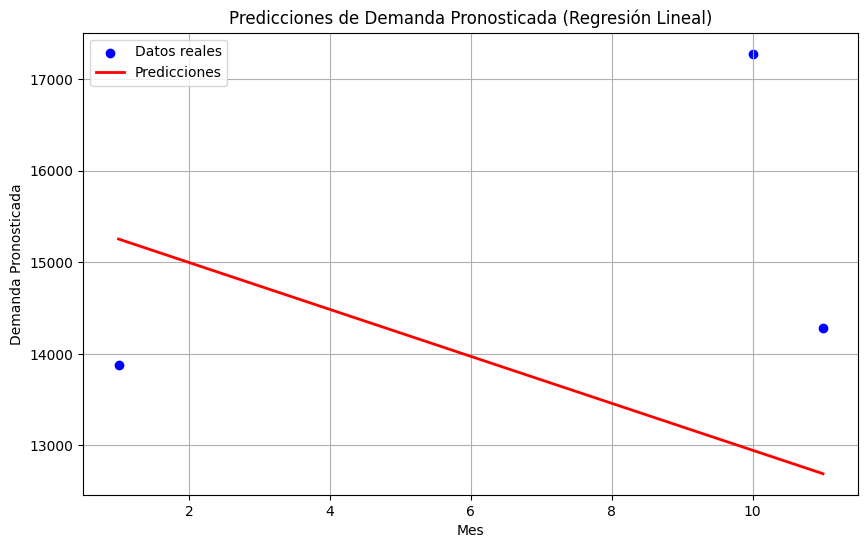

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Convertir los DataFrames a arrays de numpy
X = demand_forecast_df['Month'].values.reshape(-1, 1)  # Mes como característica
y = demand_forecast_df['Demand_Forecast'].values  # Demanda pronosticada como variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Métricas de Evaluación:")
print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
plt.title('Predicciones de Demanda Pronosticada (Regresión Lineal)')
plt.xlabel('Mes')
plt.ylabel('Demanda Pronosticada')
plt.legend()
plt.grid(True)
plt.show()

En este código, primero convertimos los datos de pronóstico de demanda en arrays de numpy, dividiéndolos en conjuntos de entrenamiento y prueba. Luego, entrenamos un modelo de regresión lineal utilizando el conjunto de entrenamiento y realizamos predicciones en el conjunto de prueba. Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo. Finalmente, graficamos los datos reales y las predicciones para visualizar cómo se ajusta el modelo a los datos.

### Comparación 

Vamos a utilizar algunos modelos comunes, como la regresión lineal, el árbol de decisión y el bosque aleatorio. Aquí tienes cómo podríamos hacerlo:

Modelo: Regresión Lineal
Error Cuadrático Medio (MSE): 7726743.751854397
Coeficiente de Determinación (R²): -2.361595157509009



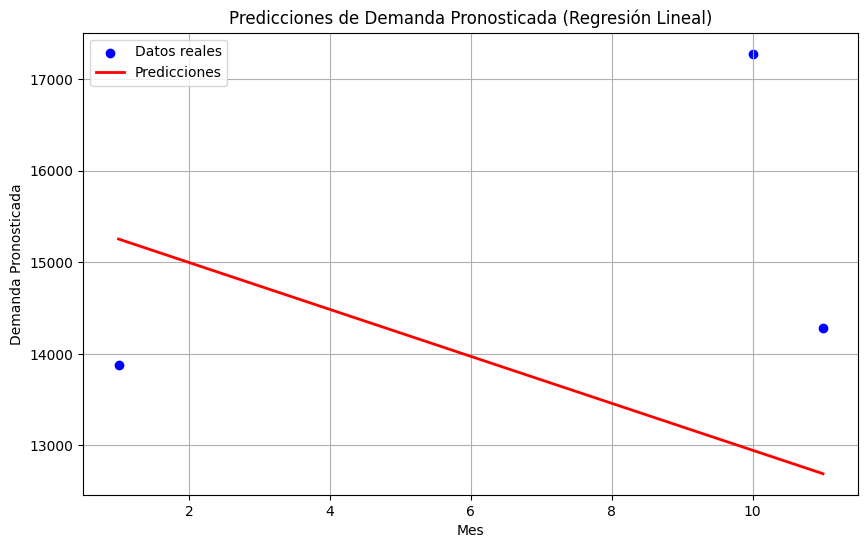

Modelo: Árbol de Decisión
Error Cuadrático Medio (MSE): 16172813.333333334
Coeficiente de Determinación (R²): -6.036140026202198



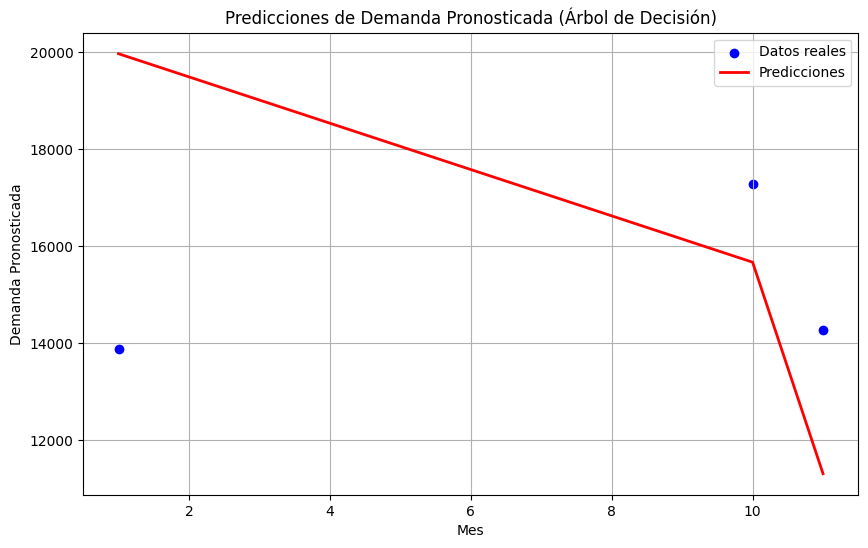

Modelo: Bosque Aleatorio
Error Cuadrático Medio (MSE): 5443789.883266669
Coeficiente de Determinación (R²): -1.3683738322102195



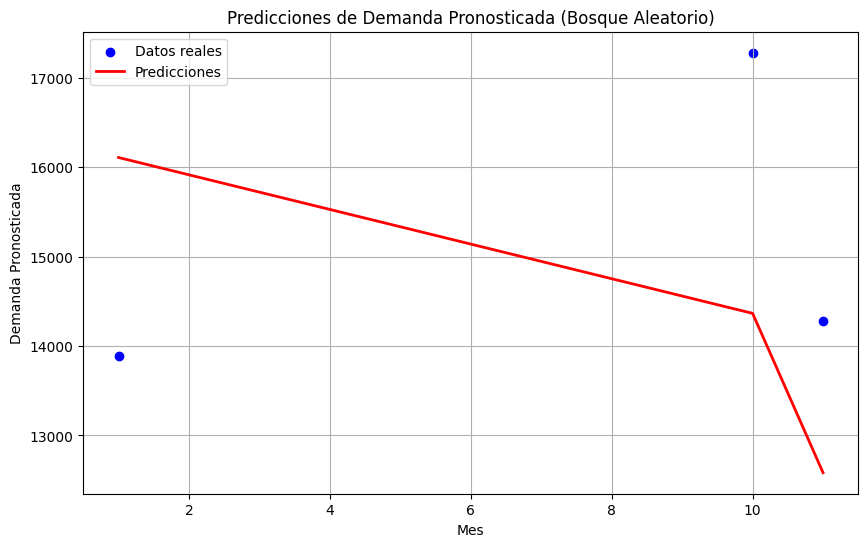

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Modelos a probar
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Bosque Aleatorio': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Entrenar y evaluar los modelos
for name, model in models.items():
    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Modelo: {name}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Coeficiente de Determinación (R²): {r2}")
    print()

    # Graficar resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos reales')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
    plt.title(f'Predicciones de Demanda Pronosticada ({name})')
    plt.xlabel('Mes')
    plt.ylabel('Demanda Pronosticada')
    plt.legend()
    plt.grid(True)
    plt.show()

Este código entrena y evalúa tres modelos diferentes: regresión lineal, árbol de decisión y bosque aleatorio. Para cada modelo, calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R²) en el conjunto de prueba, y graficamos las predicciones para visualizar el rendimiento del modelo. Después de ejecutar este código, podrás comparar los rendimientos de los diferentes modelos y determinar cuál funciona mejor para tu caso de predicción de la demanda.

### Más modelos

modelos Support Vector Machines (SVM), Gradient Boosting Regressor (GBR) y Artificial Neural Network (ANN) para completar la comparación.

Modelo: Regresión Lineal
Error Cuadrático Medio (MSE): 7726743.751854397
Coeficiente de Determinación (R²): -2.361595157509009



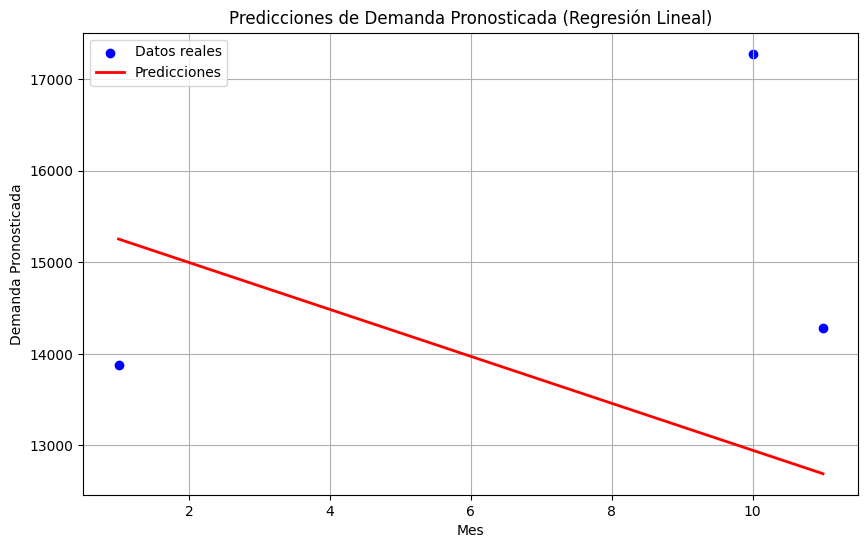

Modelo: Árbol de Decisión
Error Cuadrático Medio (MSE): 16172813.333333334
Coeficiente de Determinación (R²): -6.036140026202198



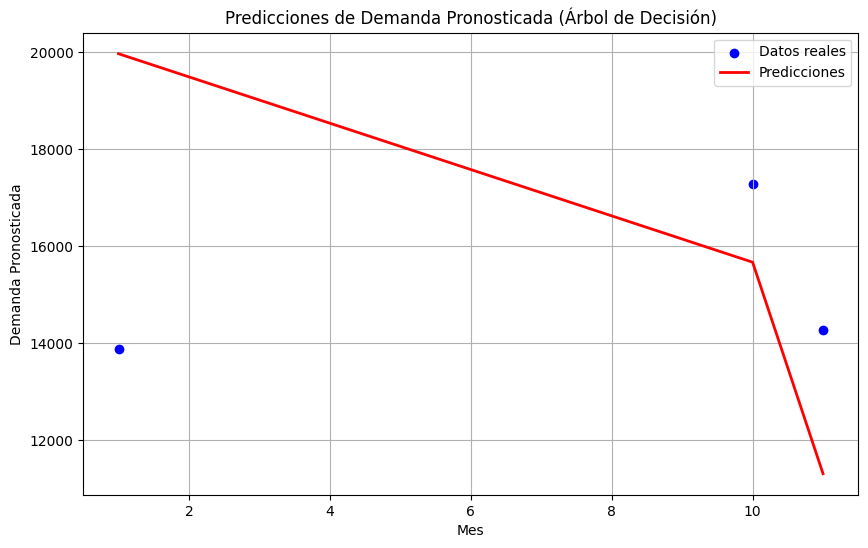

Modelo: Bosque Aleatorio
Error Cuadrático Medio (MSE): 5443789.883266669
Coeficiente de Determinación (R²): -1.3683738322102195



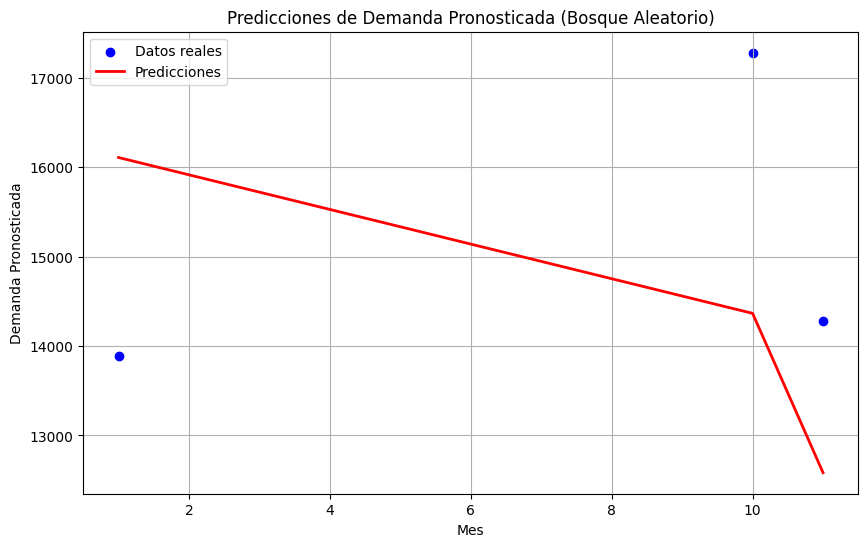

Modelo: Support Vector Machines
Error Cuadrático Medio (MSE): 7524125.090543096
Coeficiente de Determinación (R²): -2.2734439346188284



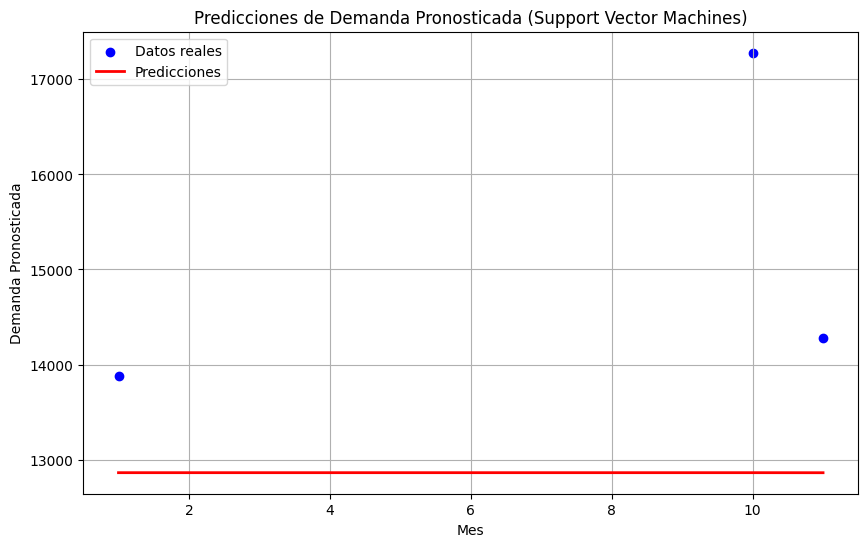

Modelo: Gradient Boosting Regressor
Error Cuadrático Medio (MSE): 16158256.442967504
Coeficiente de Determinación (R²): -6.029806909208326



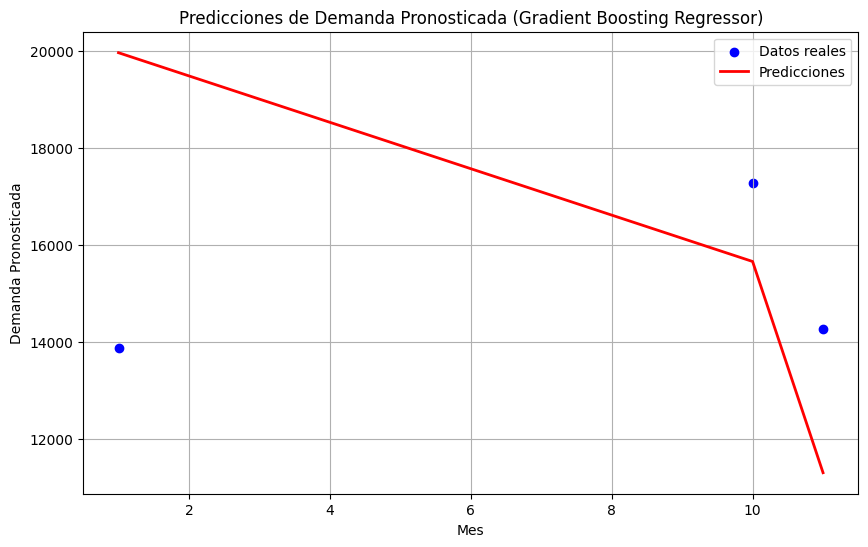

c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Modelo: Red Neuronal Artificial
Error Cuadrático Medio (MSE): 201459589.50954342
Coeficiente de Determinación (R²): -86.64695740899931



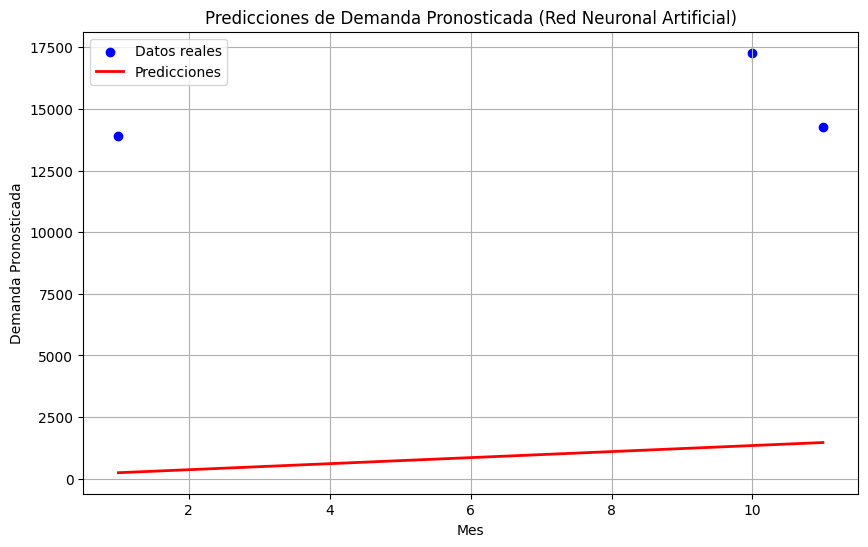

In [8]:
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

# Modelos a probar
models = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Bosque Aleatorio': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machines': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Red Neuronal Artificial': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
}

# Entrenar y evaluar los modelos
for name, model in models.items():
    # Entrenamiento
    model.fit(X_train, y_train)
    
    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Modelo: {name}")
    print(f"Error Cuadrático Medio (MSE): {mse}")
    print(f"Coeficiente de Determinación (R²): {r2}")
    print()

    # Graficar resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='blue', label='Datos reales')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')
    plt.title(f'Predicciones de Demanda Pronosticada ({name})')
    plt.xlabel('Mes')
    plt.ylabel('Demanda Pronosticada')
    plt.legend()
    plt.grid(True)
    plt.show()

## Preprocesamiento de datos:
Podemos realizar el preprocesamiento de datos común para todos los modelos, que incluye la división de datos y la normalización de las características (si es necesario).

In [9]:
from sklearn.preprocessing import StandardScaler

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Selección de características:
Para la regresión lineal y el SVM, no necesitamos realizar selección de características ya que estamos utilizando una sola característica (mes). Sin embargo, para modelos como el bosque aleatorio y el árbol de decisión, podríamos explorar la importancia de las características y seleccionar las más relevantes si es necesario.

In [10]:
# Explorar la importancia de las características (para modelos basados en árboles)
feature_importances = model.feature_importances_

AttributeError: 'MLPRegressor' object has no attribute 'feature_importances_'

## Entrenamiento del modelo:
Continuamos con el entrenamiento del modelo utilizando los datos de entrenamiento preprocesados.

In [11]:
# Entrenar el modelo con los datos de entrenamiento preprocesados
model.fit(X_train_scaled, y_train)

c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(max_iter=1000)

## Validación y ajuste del modelo:
Evaluamos el rendimiento del modelo en los datos de prueba y ajustamos los hiperparámetros si es necesario.

In [12]:
# Realizar predicciones en el conjunto de prueba preprocesado
y_pred_scaled = model.predict(X_test_scaled)

# Métricas de evaluación en los datos de prueba preprocesados
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Modelo: {name}")
print(f"Error Cuadrático Medio (MSE) con datos preprocesados: {mse_scaled}")
print(f"Coeficiente de Determinación (R²) con datos preprocesados: {r2_scaled}")
print()

Modelo: Red Neuronal Artificial
Error Cuadrático Medio (MSE) con datos preprocesados: 226371532.07809338
Coeficiente de Determinación (R²) con datos preprocesados: -97.48514076178382



## Predicción de la demanda:
Finalmente, podemos utilizar el modelo entrenado con los datos preprocesados para hacer predicciones sobre la demanda futura.

In [14]:
# Supongamos que queremos predecir la demanda futura para los próximos 3 meses
future_months = np.array([4, 5, 6]).reshape(-1, 1)  # Meses futuros
future_data = scaler.transform(future_months)  # Normalizar los meses futuros

# Realizar predicciones sobre la demanda futura
future_demand = model.predict(future_data)

print("Predicciones de Demanda Futura:")
for month, demand in zip([4, 5, 6], future_demand):
    print(f"Mes {month}: {demand}")

Predicciones de Demanda Futura:
Mes 4: 168.45965736153653
Mes 5: 160.2400580595357
Mes 6: 152.0204587575349


En este ejemplo, estamos suponiendo que queremos predecir la demanda para los próximos 3 meses (meses 4, 5 y 6). Creamos un array numpy con estos meses, lo normalizamos utilizando el mismo scaler que utilizamos para normalizar los datos de entrenamiento y prueba, y luego hacemos predicciones de demanda utilizando el modelo entrenado. Finalmente, imprimimos las predicciones de demanda para los meses futuros.

Con este enfoque, puedes realizar predicciones de demanda futura utilizando el modelo entrenado.

Para graficar distintivamente los datos históricos y las predicciones en el mismo gráfico, puedes seguir estos pasos:

Grafica los datos históricos como puntos (o líneas) en un color, por ejemplo, azul.
Grafica las predicciones como una línea continua en otro color, por ejemplo, rojo.

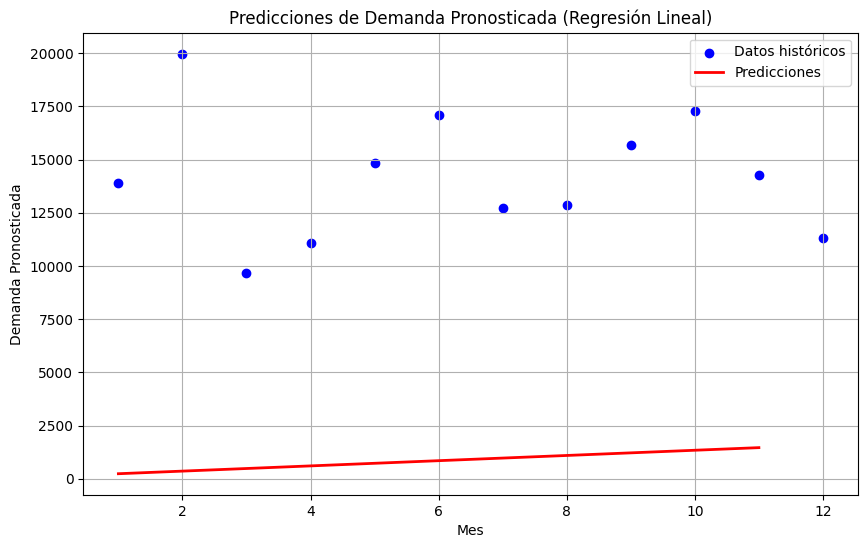

In [16]:
# Graficar datos históricos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos históricos')

# Graficar predicciones
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicciones')

plt.title('Predicciones de Demanda Pronosticada (Regresión Lineal)')
plt.xlabel('Mes')
plt.ylabel('Demanda Pronosticada')
plt.legend()
plt.grid(True)
plt.show()

## Visualizaciones extra

Vamos a crear estas visualizaciones adicionales utilizando los datos y los modelos que hemos estado trabajando.

### Gráfico de tendencias de la demanda histórica:

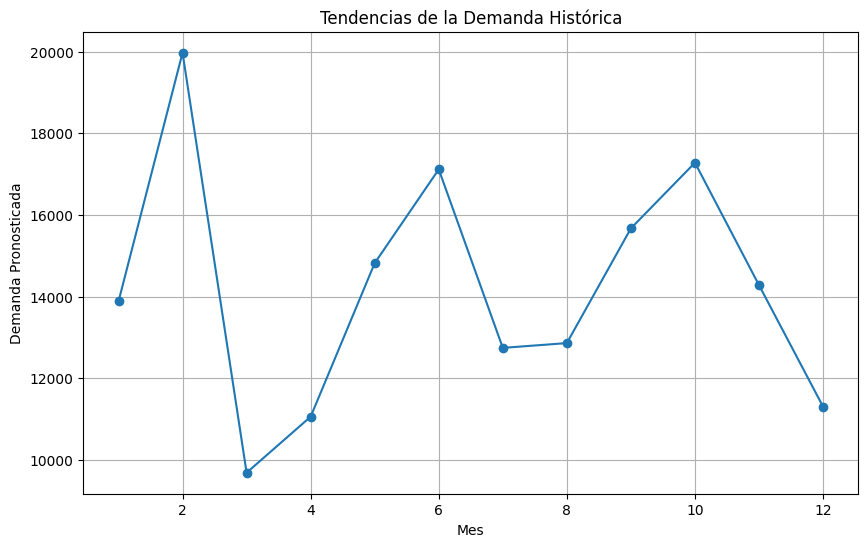

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(demand_forecast_df['Month'], demand_forecast_df['Demand_Forecast'], marker='o')
plt.title('Tendencias de la Demanda Histórica')
plt.xlabel('Mes')
plt.ylabel('Demanda Pronosticada')
plt.grid(True)
plt.show()

### Diagrama de dispersión de la demanda pronosticada vs. la demanda real:

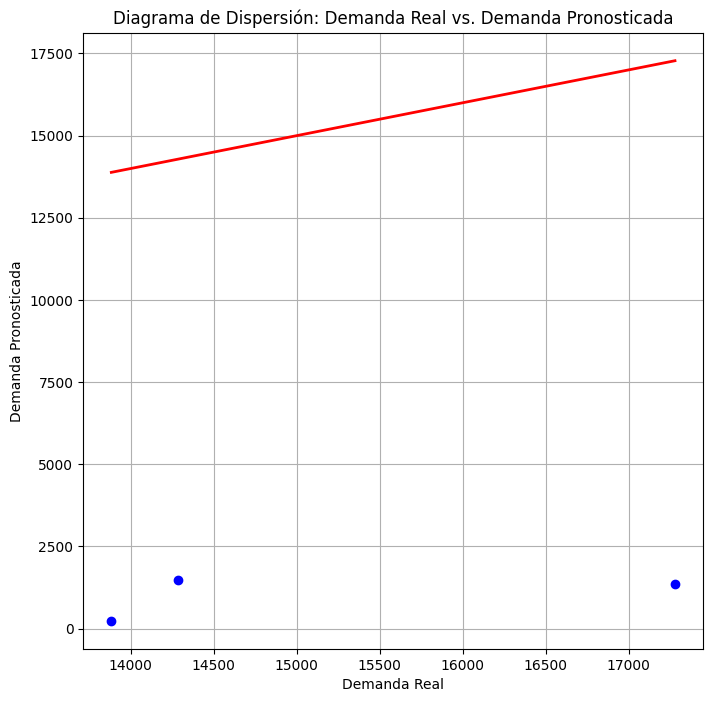

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Diagrama de Dispersión: Demanda Real vs. Demanda Pronosticada')
plt.xlabel('Demanda Real')
plt.ylabel('Demanda Pronosticada')
plt.grid(True)
plt.show()

### Gráfico de residuos:

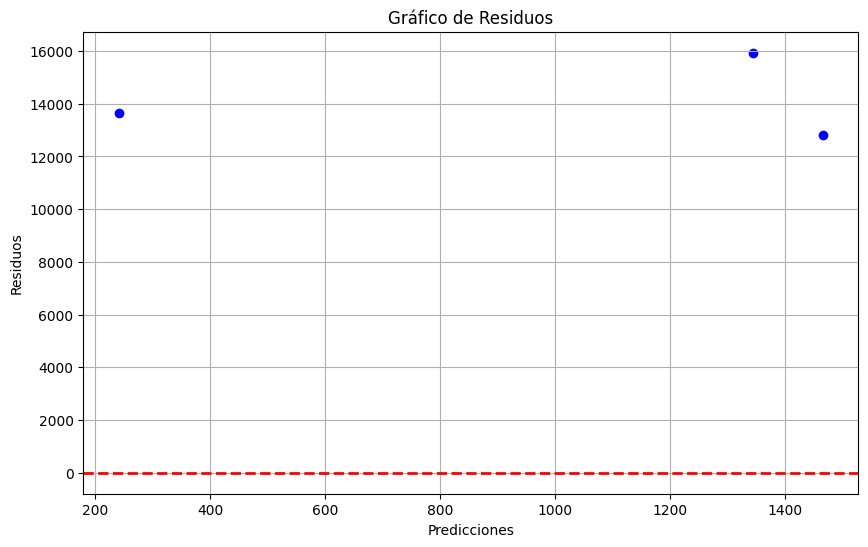

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Gráfico de Residuos')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

### Gráfico de importancia de características (para modelos basados en árboles):

In [20]:
if isinstance(model, DecisionTreeRegressor) or isinstance(model, RandomForestRegressor):
    feature_importances = model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances, tick_label=['Mes'])
    plt.title('Importancia de Características')
    plt.xlabel('Características')
    plt.ylabel('Importancia')
    plt.grid(True)
    plt.show()

### Gráfico de validación cruzada:
Si hubiesemos utilizando validación cruzada, podemos usar las funciones integradas de visualización de las bibliotecas como Scikit-learn o seaborn para trazar los resultados de la validación cruzada. Por ejemplo, para visualizar las puntuaciones R² en cada pliegue de la validación cruzada, podriamos hacer algo como esto:

c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Ariel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the 

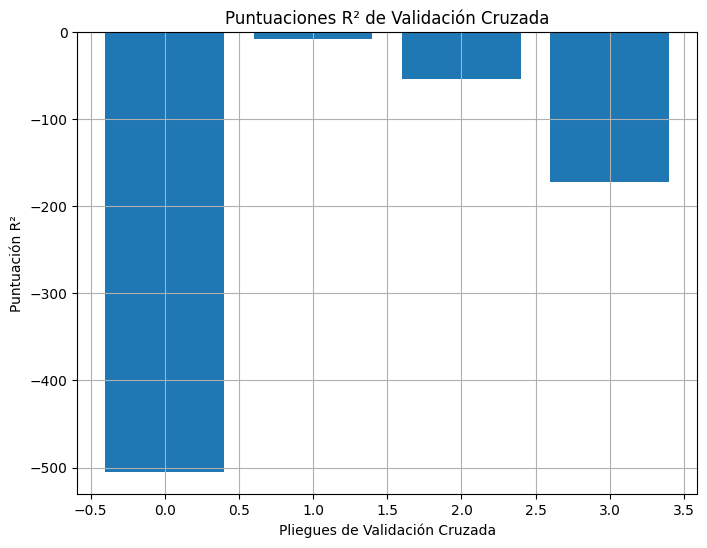

In [21]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

plt.figure(figsize=(8, 6))
plt.bar(range(len(cv_scores)), cv_scores)
plt.title('Puntuaciones R² de Validación Cruzada')
plt.xlabel('Pliegues de Validación Cruzada')
plt.ylabel('Puntuación R²')
plt.grid(True)
plt.show()